Importing All the Libraries

In [1]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
import nltk

In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

Importing csv file from google Drive

In [4]:
from google.colab import drive 

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
filename = '/content/drive/MyDrive/Sentiment Analysis/imbd.csv'

In [7]:
batch_size = 20000

for df in pd.read_csv(filename, chunksize=batch_size):
  print(df.shape)

(20000, 2)
(20000, 2)
(10000, 2)


In [8]:
df.shape

(10000, 2)

In [9]:
#df= pd.read_csv(filename)

Shuffling the dataset

In [10]:
df = df.sample(frac = 1)

In [11]:
df

,review,sentiment
43315,"9/10- 30 minutes of pure holiday terror. Okay,...",positive
46799,"Although it has been 2 years, I still remember...",negative
45513,I don't know why people except a lot from low ...,positive
44772,OK. Not bad movie making if it were from an or...,negative
41564,Solange is not a great Italian thriller. Get r...,negative
...,...,...
46268,'P' (or Club-P) should really be called 'L' fo...,negative
47097,I only bought this DVD because it was dirt che...,negative
43404,I was in physical pain watching the eyes of th...,negative
41520,I had enjoyed the Masters of Horror Series unt...,negative


Dataset information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 43315 to 47702
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


Fetching the count of sentiment column

In [13]:
df['sentiment'].value_counts()

positive    5007
negative    4993
Name: sentiment, dtype: int64

In [14]:
df.columns

Index(['review', 'sentiment'], dtype='object')

Removing Null values

In [15]:
np.sum(df.isnull().any(axis=1))

0

In [16]:
df.isna().any().sum()

0

In [17]:
df.duplicated()

43315    False
46799    False
45513    False
44772    False
41564    False
         ...  
46268    False
47097    False
43404    False
41520    False
47702    False
Length: 10000, dtype: bool

In [18]:
df.replace('NaN',np.nan, inplace=True)
df

,review,sentiment
43315,"9/10- 30 minutes of pure holiday terror. Okay,...",positive
46799,"Although it has been 2 years, I still remember...",negative
45513,I don't know why people except a lot from low ...,positive
44772,OK. Not bad movie making if it were from an or...,negative
41564,Solange is not a great Italian thriller. Get r...,negative
...,...,...
46268,'P' (or Club-P) should really be called 'L' fo...,negative
47097,I only bought this DVD because it was dirt che...,negative
43404,I was in physical pain watching the eyes of th...,negative
41520,I had enjoyed the Masters of Horror Series unt...,negative


In [19]:
df.duplicated().count()

10000

In [20]:
df

,review,sentiment
43315,"9/10- 30 minutes of pure holiday terror. Okay,...",positive
46799,"Although it has been 2 years, I still remember...",negative
45513,I don't know why people except a lot from low ...,positive
44772,OK. Not bad movie making if it were from an or...,negative
41564,Solange is not a great Italian thriller. Get r...,negative
...,...,...
46268,'P' (or Club-P) should really be called 'L' fo...,negative
47097,I only bought this DVD because it was dirt che...,negative
43404,I was in physical pain watching the eyes of th...,negative
41520,I had enjoyed the Masters of Horror Series unt...,negative


In [21]:
df.isnull().sum().sum()

0

Vizualizing the Data

<AxesSubplot:xlabel='sentiment', ylabel='count'>

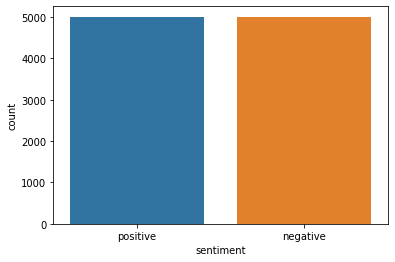

In [22]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [23]:

df.shape

(10000, 2)

Cleaning the Dataset


In [26]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
stop_words = stopwords.words('english')

In [28]:
import re             # re -> regular expressions
REPLACE_BY_SPACE_RE = re.compile('[/(){}—[]|@,;‘?|।!-॥–’-]')

def clean_text(sample):
  sample = sample.lower()
  sample = sample.replace("", "")
  sample = REPLACE_BY_SPACE_RE.sub(' ', sample)
  sample = re.sub("[^a-z]+", " ", sample)
  sample = sample.split(" ")
  sample = [word for word in sample if word not in stop_words ]
  sample = " ".join(sample)
  return sample

In [29]:
df['review'] = df['review'].apply(clean_text)

In [30]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['review']=df['review'].apply(lambda x: cleaning_numbers(x))
df['review'].tail()

46268     p club p really called l lame every festival ...
47097    bought dvd dirt cheap seemed interesting speci...
43404    physical pain watching eyes cast participated ...
41520    enjoyed masters horror series came upon infant...
47702    adorable movie real feel good movie need one s...
Name: review, dtype: object

In [31]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['review']=df['review'].apply(lambda x: stemming_on_text(x))
df['review'].head()

43315     minutes pure holiday terror okay scary sure f...
46799    although years still remember complete waste c...
45513    know people except lot low budget indie films ...
44772    ok bad movie making original script br br part...
41564    solange great italian thriller get ready spoil...
Name: review, dtype: object

In [32]:
df['review'] = df['review'].astype(str)
df.head()

,review,sentiment
43315,minutes pure holiday terror okay scary sure f...,positive
46799,although years still remember complete waste c...,negative
45513,know people except lot low budget indie films ...,positive
44772,ok bad movie making original script br br part...,negative
41564,solange great italian thriller get ready spoil...,negative


In [33]:
df = df.sample(frac = 1)

Adding the column of Score

In [34]:
conditions = [
    (df['sentiment'] == 'positive'),
    (df['sentiment'] == 'negative')
    ]
values = [1, 0]
df['score'] = np.select(conditions, values)
df.head()

,review,sentiment,score
47168,bad plot bad acting bad direction br br possib...,negative,0
47784,frederick forsyth books always intricately plo...,negative,0
40912,film insult play upon based character claude w...,negative,0
44001,house spirits quite awful live south america ...,negative,0
49281,cover art features man holding scary pellet gu...,negative,0


Creating a wordCloud of Positive and Negative Words

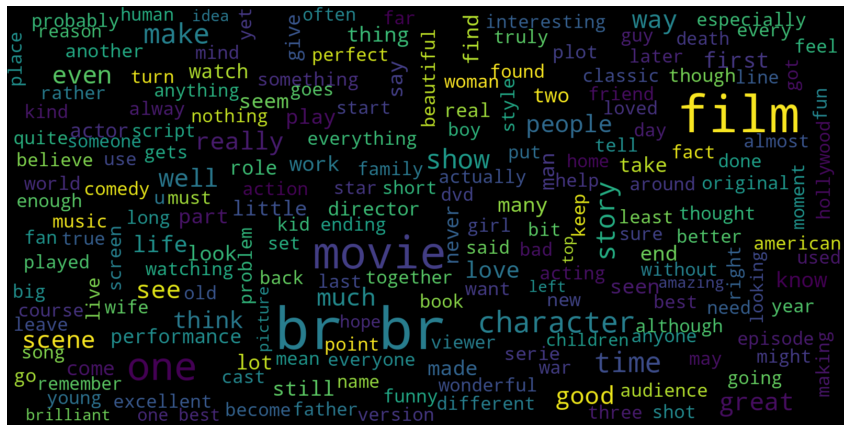

In [35]:
consolidated=' '.join(word for word in df['review'][df['sentiment']=='positive'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

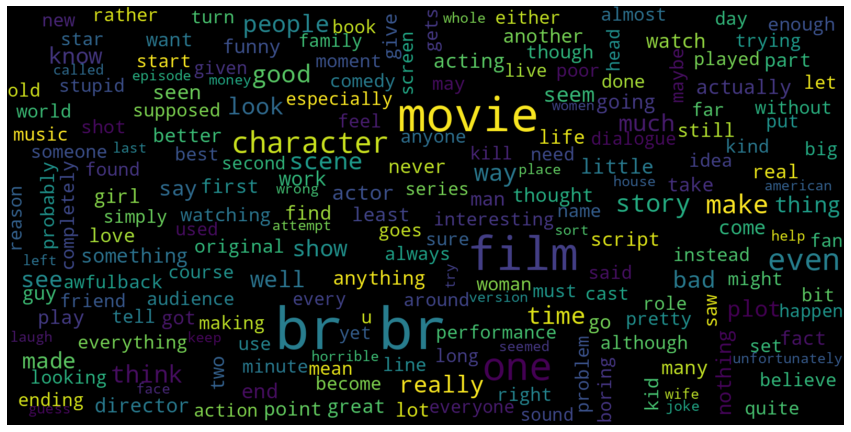

In [36]:
consolidated=' '.join(word for word in df['review'][df['sentiment']=='negative'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Building the Model

In [37]:

X = df['review']
y = df['score']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [39]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0,stratify = y)

In [40]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([3719, 3781]))

In [41]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([1274, 1226]))

In [42]:


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
svm_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC( probability=True, kernel="linear"))])

In [43]:
svm_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', SVC(kernel='linear', probability=True))])

In [44]:
svm_pred = svm_model.predict(X_test)
np.unique(svm_pred,return_counts=True)

(array([0, 1]), array([1242, 1258]))

In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(svm_pred,y_test)*100

88.32

In [46]:
confusion_matrix(svm_pred,y_test)

array([[1112,  130],
       [ 162, 1096]])

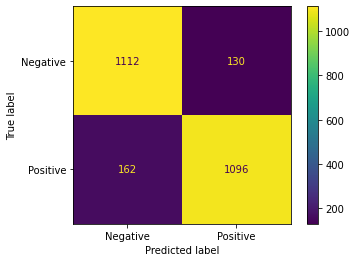

In [47]:
from sklearn import metrics
cm = confusion_matrix(svm_pred,y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Negative", "Positive"])

cm_display.plot()
plt.show()

In [48]:

print(classification_report(svm_pred,y_test))
     

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1242
           1       0.89      0.87      0.88      1258

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

ROC curve

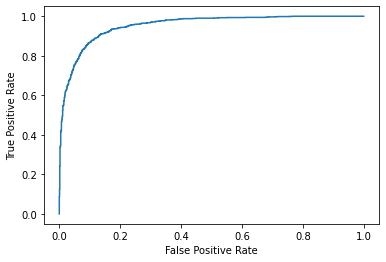

In [50]:
y_pred_proba = svm_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC curve

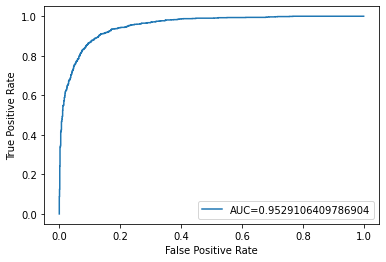

In [51]:
y_pred_proba = svm_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Testing the model with new inputs

In [52]:
svm_model.predict([" great experience with this movie"])

array([1])

In [53]:
svm_model.predict([" worst movie"])

array([0])

Creating and Importing the pickle file

In [54]:
import joblib
joblib.dump(svm_model,'svm.pkl')

['svm.pkl']

In [55]:
from google.colab import files
files.download('svm.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>